In [ ]:
# Built-in imports
import os
import sys
import random

# Image processing imports
import cv2

# Machine learning imports
import numpy as np; print('NUMPY Version:{}'.format(np.__version__))
import pandas as pd; print('PANDAS Version:{}'.format(pd.__version__))
import tensorflow as tf; print('TENSORFLOW Version:{}'.format(tf.__version__))

# Visualization imports
import matplotlib.pyplot as plt

NUMPY Version:1.21.5
PANDAS Version:1.4.2
TENSORFLOW Version:2.9.1


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  
IMG_SIZE = 300
BATCH_SIZE = 32
EPOCHS = 10

DATA_DIR = 'data2a/'
train_dir = os.path.join(DATA_DIR, 'training/')
test_dir = os.path.join(DATA_DIR, 'validation/')

# Attempt at deterministic outputs(Reproducibility)
def seed_it_all(seed=7):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    #rng = np.random.default_rng(seed)
    
seed_it_all()

REPLICAS:  1


In [ ]:
num_train_front = len(os.listdir(train_dir + '00-front/'))
num_train_rear = len(os.listdir(train_dir + '01-rear/'))
num_train_side = len(os.listdir(train_dir + '02-side/'))

print("Number of front train images:{}".format(num_train_front))
print("Number of rear train images:{}".format(num_train_rear))
print("Number of side train images:{}".format(num_train_side))
print("Total train images:{}".format(num_train_front + num_train_rear + num_train_side ))

print('\n')

num_test_front = len(os.listdir(test_dir + '00-front/'))
num_test_rear = len(os.listdir(test_dir + '01-rear/'))
num_test_side = len(os.listdir(test_dir + '02-side/'))

print("Number of front test images:{}".format(num_test_front))
print("Number of rear test images:{}".format(num_test_rear))
print("Number of side test images:{}".format(num_test_side))
print("Total test images:{}".format(num_test_front + num_test_rear + num_train_side))

Number of front train images:419
Number of rear train images:288
Number of side train images:272
Total train images:979


Number of front test images:73
Number of rear test images:50
Number of side test images:48
Total test images:395


In [ ]:
def display_multiple_img(image_dir, rows, cols):
    """
    Function to Display Images from Dataset.
    
    parameters: image_dir(string) - Path of directory with images
                rows(int) - No. of Rows in Output
                cols(int) - No. of Columns in Output
    """
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8))
    for ind,image_path in enumerate(os.listdir(image_dir)):
        image = cv2.imread(image_dir + image_path, -1)
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_xlabel(image.shape)
        except:
            continue;
        
    plt.tight_layout()
    plt.show()

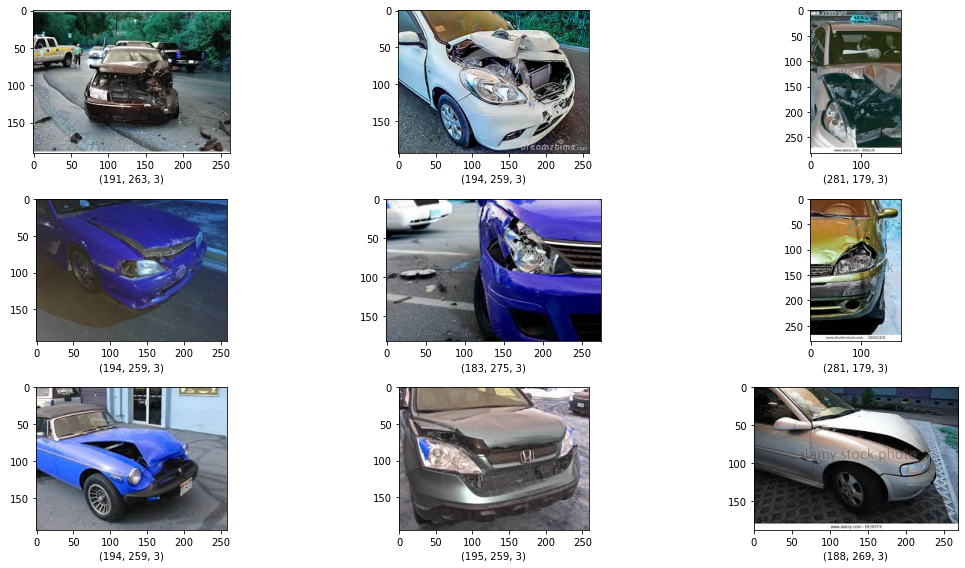

In [ ]:
# Display damaged cars
display_multiple_img(train_dir + '00-front/', 3, 3)

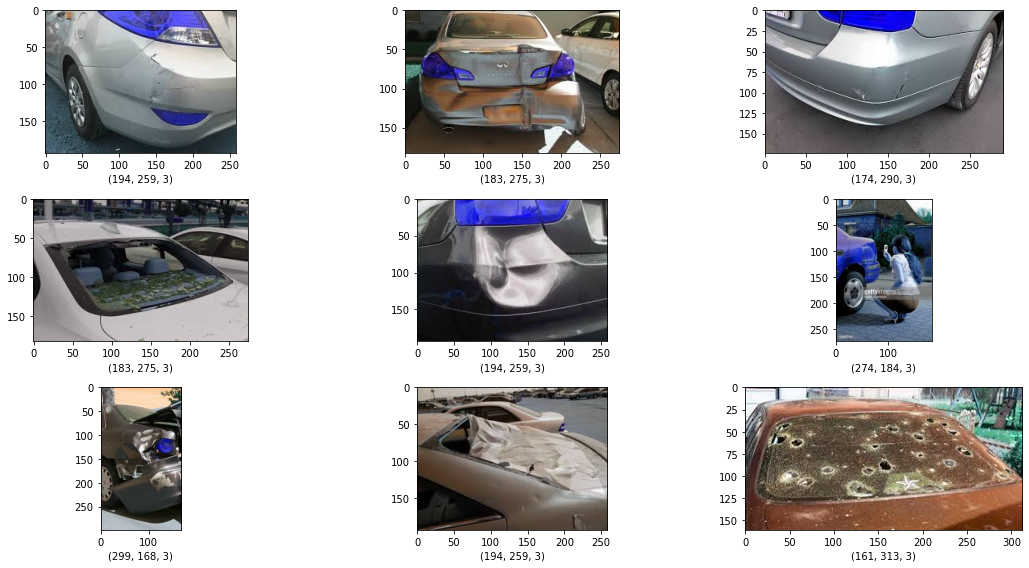

In [ ]:
# Display damaged cars
display_multiple_img(train_dir + '01-rear/', 3, 3)

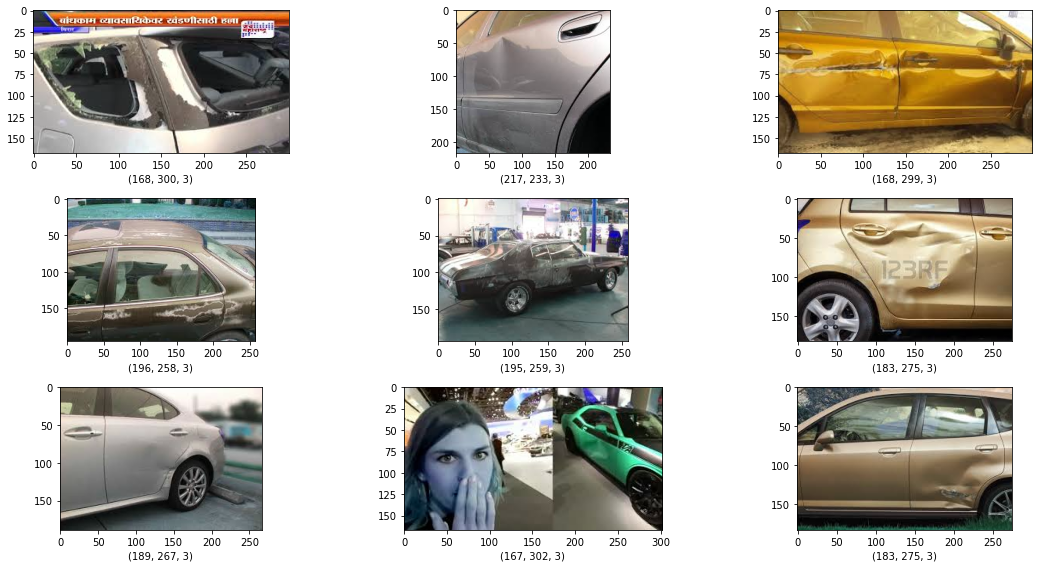

In [ ]:
# Display damaged cars
display_multiple_img(train_dir + '02-side/', 3, 3)

In [ ]:
testing_data = []
CATEGORIES=['00-front', '01-rear','02-side']
IMG_SIZE=300
import os
import cv2
from tqdm import tqdm
def create_testing_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(test_dir,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  
                # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_testing_data()

print(len(testing_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 857.65it/s]

171


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                  rotation_range=40,
                                  width_shift_range=0.4,
                                  height_shift_range=0.4,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(train_dir,
                                          target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'categorical',
                                          subset='training')

validation_generator = train_datagen.flow_from_directory(
                                            train_dir,
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical',
                                            subset='validation')
                                         
test_dataset = test_datagen.flow_from_directory(test_dir,
                                          shuffle=True,
                                          target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'categorical')

test_dataset.class_indices

Found 785 images belonging to 3 classes.
Found 194 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


{'00-front': 0, '01-rear': 1, '02-side': 2}

In [ ]:
####################TEST################
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam as Adam

In [ ]:
#########################################################################################

In [ ]:
import os
import h5py
import numpy as np
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,array_to_img, load_img
from tensorflow.keras.regularizers import l2, l1
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History

In [ ]:
def block(x, filters, kernel_size, repetitions, pool_size=2, strides=2):
    for i in range(repetitions):
        x = tf.keras.layers.Conv2D(filters, kernel_size, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size, strides)(x)
    return x

In [ ]:
def get_model():
    image_inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE , 3))
    x = block(image_inputs, 8, 3, 2)
    x = block(x, 16, 3, 2)
    x = block(x, 32, 3, 2)
    x = block(x, 64, 3, 2)
    x = block(x, 128, 3, 2)
    x = block(x, 256, 3, 2)
    x = block(x, 512, 3, 2)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    #x = Dense(256, activation = 'relu')
    #x = Dropout(0.5)
    output = tf.keras.layers.Dense(3, activation = 'softmax')(x)
   # output = tf.keras.layers.Dense(3)(x)
    model = tf.keras.Model(inputs=[image_inputs], outputs=[output])
    return model

In [ ]:
model = get_model()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= Adam(lr = 0.00005), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001)
#lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', verbose=1, patience=10, factor=0.2, min_learning_rate=0.0001)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('location.h5', monitor='val_accuracy', verbose=1,save_best_only=True,save_weights_only=False,mode='max')

callbacks = [early_stopping, model_checkpoint]

In [ ]:
####################TEST################
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
           class_weight='balanced',
           classes=np.unique(train_dataset.classes), 
           y=train_dataset.classes)
class_weights

array([0.77876984, 1.13275613, 1.20030581])

In [ ]:
history = model.fit(train_dataset, 
                    validation_data=validation_generator,
                    epochs=10,
                    callbacks=callbacks,
                    steps_per_epoch = train_dataset.samples // 2,
                    validation_steps = validation_generator.samples // 2,
                    workers=16,
                    batch_size=BATCH_SIZE)


Epoch 1/10
392/392 [==============================] - ETA: 0s - loss: 1.0702 - accuracy: 0.4304
Epoch 1: val_accuracy improved from 0.42690 to 0.46784, saving model to location.h5
392/392 [==============================] - 1190s 3s/step - loss: 1.0702 - accuracy: 0.4304 - val_loss: 1.0163 - val_accuracy: 0.4678
Epoch 2/10
392/392 [==============================] - ETA: 0s - loss: 1.0569 - accuracy: 0.4500  
Epoch 2: val_accuracy improved from 0.46784 to 0.48538, saving model to location.h5
392/392 [==============================] - 59749s 153s/step - loss: 1.0569 - accuracy: 0.4500 - val_loss: 1.0031 - val_accuracy: 0.4854
Epoch 3/10
392/392 [==============================] - ETA: 0s - loss: 1.0404 - accuracy: 0.4618
Epoch 3: val_accuracy improved from 0.48538 to 0.52047, saving model to location.h5
392/392 [==============================] - 1183s 3s/step - loss: 1.0404 - accuracy: 0.4618 - val_loss: 0.9901 - val_accuracy: 0.5205
Epoch 4/10
392/392 [==============================] - ET

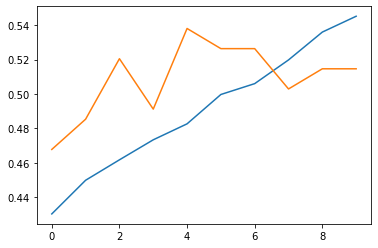

In [ ]:
####################TEST################
import seaborn as sns
loss=pd.DataFrame(model.history.history)
plt.plot(loss['accuracy'])
plt.plot(loss['val_accuracy'])

In [ ]:
####################TEST################
Xtest = []
ytest = []

for features,label in testing_data:
    Xtest.append(features)
    ytest.append(label)
Xtest = np.array(Xtest).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Xtest = Xtest/255.0
ytest=np.array(ytest)
from tensorflow.keras.utils import to_categorical
ytest = to_categorical(ytest,3)
pred=model.predict(Xtest)
y_classes = pred.argmax(axis=-1)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(ytest.argmax(axis=-1), y_classes))
accuracy_score(ytest.argmax(axis=-1), y_classes)

6/6 [==============================] - 9s 573ms/step
[[54  7 12]
 [22 18 10]
 [15 12 21]]


0.543859649122807

In [ ]:
from PyQt5.QtWidgets import QLabel, QMainWindow, QApplication, QWidget, QVBoxLayout, QPushButton,QFileDialog
from PyQt5.QtGui import QPixmap
import sys
from PyQt5 import uic, QtGui, QtCore
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
import matplotlib.image as mpimg
from PIL import Image
import cv2
#load the trained model to classify sign
from tensorflow.keras.models import load_model
model = load_model('location.h5')
classes= ['front', 'rear','side']

In [ ]:

class UI(QMainWindow):
    def __init__(self):
        super(UI, self).__init__()
        uic.loadUi('untitled2.ui',self)

        self.openImage = self.findChild(QPushButton, 'openimage')
        self.openImage.clicked.connect(self.OpenFile)

        self.imagelabel = self.findChild(QLabel, 'image')
        self.prediction = self.findChild(QLabel, 'prediction')

        self.predictbtn = self.findChild(QPushButton, 'predictbtn')
        self.predictbtn.clicked.connect(self.predictmyimage)

        self.show()
    
    def OpenFile(self):

        filename, _ = QFileDialog.getOpenFileName(None)


        if filename is None:
            pass
        else:





            print(filename)
            pixmap = QPixmap(filename)
            pixmap = pixmap.scaled(500, 1000, QtCore.Qt.KeepAspectRatio)
            self.imagelabel.setPixmap(pixmap)

            # image_profile = QtGui.QImage(filename)  # QImage object
            # image_profile = image_profile.scaled(309, 829,aspectRatioMode =QtCore.Qt.KeepAspectRatio, transformMode=QtCore.Qt.SmoothTransformation)  # To scale image for example and keep its Aspect Ration
            # self.imagelabel.setPixmap(QtGui.QPixmap.fromImage(image_profile))

            # pixmap4 = pixmap.scaled(64, 64, QtCore.Qt.KeepAspectRatio)

            # self.imagelabel.resize(500, 1000)


            global fname
            fname = filename


        pass



    def predictmyimage(self):

        self.prediction.setText("TESTING")
        time.sleep(2)
        
        
        num_px = 300
        my_label_y = [1]
        print('name\n', fname)

        image = np.array(plt.imread(fname))

        my_image = np.array(Image.fromarray(image).resize(size=(num_px, num_px)))
        my_image = np.expand_dims(my_image, axis=0)
        my_image = my_image/255.
        classe = model.predict(my_image)
        print(classe)
        result = np.squeeze(classe)
        print(result)
        result_indices = np.argmax(result)
        print(result_indices)
        sign = "{}    ||   {:.2f}%".format(classes[result_indices],result[result_indices]*100)
        print(sign)
        
        if (result_indices == 0) :
            print(" IT'S A front")
            self.prediction.setText("Our model predicts a  " + sign)

        elif (result_indices == 1) :
            print(" IT'S A rear")
            self.prediction.setText("Our model predicts a  " + sign)
        else:
            print(" IT'S A side")
            self.prediction.setText("Our model predicts a  " + sign)

        pass      

In [ ]:
app = QApplication(sys.argv)
window = UI()
app.exec_()


C:/Users/cdma_pc/CDMA Solutions/car-damage-detective/data2a/training/02-side/0003.JPEG
name
 C:/Users/cdma_pc/CDMA Solutions/car-damage-detective/data2a/training/02-side/0003.JPEG
1/1 [==============================] - 0s 272ms/step
[[0.27206528 0.33607748 0.39185724]]
[0.27206528 0.33607748 0.39185724]
2
side    ||   39.19%
 IT'S A side
C:/Users/cdma_pc/CDMA Solutions/car-damage-detective/data2a/training/01-rear/0002.JPEG
name
 C:/Users/cdma_pc/CDMA Solutions/car-damage-detective/data2a/training/01-rear/0002.JPEG
1/1 [==============================] - 0s 47ms/step
[[0.29116946 0.33825806 0.37057248]]
[0.29116946 0.33825806 0.37057248]
2
side    ||   37.06%
 IT'S A side
name
 C:/Users/cdma_pc/CDMA Solutions/car-damage-detective/data2a/training/01-rear/0002.JPEG
1/1 [==============================] - 0s 47ms/step
[[0.29116946 0.33825806 0.37057248]]
[0.29116946 0.33825806 0.37057248]
2
side    ||   37.06%
 IT'S A side
C:/Users/cdma_pc/CDMA Solutions/car-damage-detective/data2a/training/

0

In [ ]:
######################################Architecture#####################################

In [ ]:
import os
import glob
from tensorflow.keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.layers import Input, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

num_classes = 4  # Change according to your application
batch_size = 32

In [ ]:
if num_classes == 2:
    last_layer_classifier = num_classes - 1
    cl_mode = 'binary'
    classifier_loss = 'binary_crossentropy'
else:
    last_layer_classifier = num_classes - 1
    cl_mode = 'categorical'
    classifier_loss = 'categorical_crossentropy'


In [ ]:
 #2. Data pre-processing
main_output_dir = 'data2a/'
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

main_dir = os.getcwd()
output_dir = main_output_dir + 'training'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print('Download training data abd place it in training_set directory')

In [ ]:
output_dir = main_output_dir + 'validation/'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print('Download test data abd place it in test_set directory')

In [ ]:
train_samples = 8000  # change according to your application
test_samples = 2000  # change according to your application
training_set = train_datagen.flow_from_directory('data2a/training/', target_size=(224, 224), batch_size=batch_size,
                                                     class_mode=cl_mode)
test_set = test_datagen.flow_from_directory('data2a/validation/', target_size=(224, 224), batch_size=batch_size,
                                                class_mode=cl_mode)

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [ ]:
 # 3. import pre-trained network

model = VGG19(weights='imagenet', include_top=True)
print(model.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# 4. Remove last layer of the pre-trained network and add layer according to available classes

x = Dense(last_layer_classifier, activation='softmax', name='predictions')(model.layers[-2].output)
my_model = Model(model.input, x)
print(my_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
 # 5. List of callbacks

weight_name = 'vgg19_stage2_fc.hdf5'
checkpoint = ModelCheckpoint(weight_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='min')
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', cooldown=0,
                           min_lr=0.000000001)
callbacks_list = [checkpoint, lr, early]

In [ ]:
# 6. Model compile and train the model

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
my_model.compile(optimizer=adam, loss=classifier_loss, metrics=['accuracy'])    

history = my_model.fit(training_set, 
                    validation_data=test_set,
                    epochs=10,
                    callbacks=callbacks_list,
                    steps_per_epoch = training_set.samples // 16,
                    validation_steps = test_set.samples // 16,
                    workers=16,
                    batch_size=batch_size,
                    shuffle=True,
                    verbose=1)


C:\Users\cdma_pc\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
61/61 [==============================] - ETA: 0s - loss: 234.2475 - accuracy: 0.3531 
Epoch 1: val_loss improved from inf to 1.10063, saving model to image_classification_model_weights2.h5
61/61 [==============================] - 2989s 48s/step - loss: 234.2475 - accuracy: 0.3531 - val_loss: 1.1006 - val_accuracy: 0.2809 - lr: 0.0010
Epoch 2/10
61/61 [==============================] - ETA: 0s - loss: 1.1277 - accuracy: 0.3702 
Epoch 2: val_loss did not improve from 1.10063
61/61 [==============================] - 2695s 44s/step - loss: 1.1277 - accuracy: 0.3702 - val_loss: 1.1211 - val_accuracy: 0.4381 - lr: 0.0010
Epoch 3/10
61/61 [==============================] - ETA: 0s - loss: 1.1268 - accuracy: 0.3769 
Epoch 3: val_loss improved from 1.10063 to 1.09264, saving model to image_classification_model_weights2.h5
61/61 [==============================] - 3186s 52s/step - loss: 1.1268 - accuracy: 0.3769 - val_loss: 1.0926 - val_accuracy: 0.4214 - lr: 0.0010
Epoch 4/10
61/61 [=

In [ ]:
 # 7. Plot the curves

    # Accuracy curve
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model categorical accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('accuracy.png')
    plt.close()

    # Loss curve
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('loss.png')